- Experiments of the real-word data, including iris, wine, glass, breast cancer and hepatitis. you can test each algorithm on each dataset by excuting the corresponding section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import measures_calculator,matchY

import api
imp.reload(api)

<module 'api' from '../utils/api.py'>

In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'iris':
            df=pd.read_csv('./real_data/iris.csv', header=None)
            X=df.iloc[1:,:-1].values.astype(np.float)
            Y_true=df.iloc[1:,-1].values.astype(np.float)
            return X,Y_true
        
        if name=='wine':
            df = pd.read_csv('./real_data/wine.csv', header=None)
            X = df.iloc[1:,:-1].values.astype(np.float)
            Y_true = df.iloc[1:,-1].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='glass':
            df = pd.read_csv('./real_data/glass.csv', header=0)
            X = df.iloc[:,:-1].values.astype(np.float)
            Y_true = df.iloc[:,-1].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='breast cancer':
            df = pd.read_csv('./real_data/wdbc.data', header=None)
            X = df.iloc[:,2:].values.astype(np.float)
            Y_true = df.iloc[:,1]

            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='hepatitis':
            df = pd.read_csv('./real_data/hepatitis.data', header=None)
            df.replace('?',np.nan,inplace=True)
            df = df.apply(pd.to_numeric, errors='coerce')
            df = df.fillna(df.mean())

            X = df.iloc[1:,1:].values.astype(np.float)
            Y_true = df.iloc[1:,0].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true

# GDT

## iris

,f1,ARI,ACC,cover_rate,classes
0,0.866823,0.705452,0.82,1.0,4.0


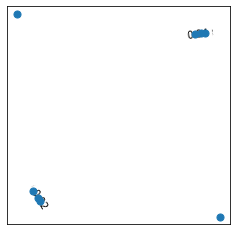

In [3]:
X,Y_true=DataLoader.load('iris')
Y_pred = api.DGSFC.fit( X,
                      K_d=9,
                      K_s=6,
                      alpha=0.35,
                      epsilon=0,
                      plot=True,
                      scale=True
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## wine

,f1,ARI,ACC,cover_rate,classes
0,0.913891,0.755932,0.91573,1.0,3.0


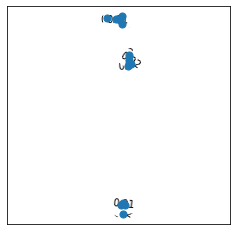

In [4]:
X,Y_true=DataLoader.load('wine')

Y_pred = api.DGSFC.fit( X,
                      K_d=6,
                      K_s=3,
                      alpha=0.1,
                      epsilon=0,
                      plot=True,
                      scale=True
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## 	Breast Cancer Wisconsin

,f1,ARI,ACC,cover_rate,classes
0,0.922795,0.717542,0.924429,1.0,2.0


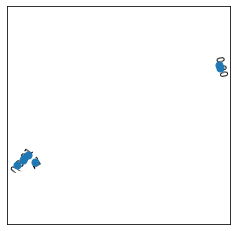

In [5]:
X,Y_true=DataLoader.load('breast cancer')

Y_pred = api.DGSFC.fit( X,
                      K_d=9,
                      K_s=8,
                      alpha=0.15,
                      epsilon=0,
                      plot=True,
                      scale=True
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## glass

,f1,ARI,ACC,cover_rate,classes
0,0.507575,0.177549,0.504808,0.971963,7.0


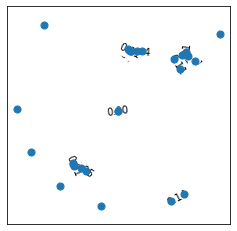

In [6]:
X,Y_true=DataLoader.load('glass')

Y_pred= api.DGSFC.fit( X,
                      K_d=3,
                      K_s=2,
                      alpha=0,
                      epsilon=3,
                      plot=True,
                      scale=True
                     )
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## hepatitis

,f1,ARI,ACC,cover_rate,classes
0,0.802917,0.268781,0.824675,1.0,2.0


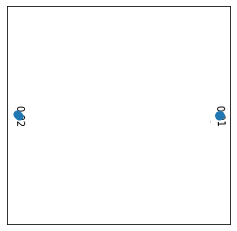

In [7]:
X,Y_true=DataLoader.load('hepatitis')

Y_pred = api.DGSFC.fit( X,
                      K_d=4,
                      K_s=3,
                      alpha=0.15,
                      epsilon=0,
                      plot=True,
                      scale=True
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

# OPTICS

In [20]:
from sklearn.cluster import OPTICS

## iris

In [21]:
X,Y_true=DataLoader.load('iris')
clustering = OPTICS(min_samples=3,min_cluster_size=3).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


,f1,ARI,ACC,cover_rate,classes
0,0.57784,0.119316,0.564516,0.413333,4.0


## wine

In [22]:
X,Y_true=DataLoader.load('wine')
clustering = OPTICS(min_samples=2,min_cluster_size=12).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.487935,0.14462,0.45122,0.460674,4.0


## breast cancer

In [23]:
X,Y_true=DataLoader.load('breast cancer')
clustering = OPTICS(min_samples=2,min_cluster_size=10).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.516853,0.106331,0.514019,0.376098,3.0


## glass

In [24]:
X,Y_true=DataLoader.load('glass')
clustering = OPTICS(min_samples=10, min_cluster_size=2).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.607438,0.428458,0.52,0.233645,4.0


## hepatitis

In [25]:
X,Y_true=DataLoader.load('hepatitis')
clustering = OPTICS(min_samples=2,min_cluster_size=2).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.645533,-0.017497,0.698113,0.688312,3.0


# DBSCAN

In [4]:
from sklearn.cluster import DBSCAN

## iris

In [45]:
X,Y_true=DataLoader.load('iris')
dbscan = DBSCAN(eps=0.3, min_samples=1).fit(X)
Y_pred = dbscan.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.64175,0.299239,0.64,1.0,4.0


## wine

In [5]:
X,Y_true=DataLoader.load('wine')
dbscan = DBSCAN(eps=20, min_samples=1).fit(X)
Y_pred = dbscan.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.614814,0.239482,0.589888,1.0,4.0


## breast cancer

In [47]:
X,Y_true=DataLoader.load('breast cancer')
dbscan = DBSCAN(eps=35, min_samples=1).fit(X)
Y_pred = dbscan.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.921261,0.718415,0.917399,1.0,3.0


## glass

In [48]:
X,Y_true=DataLoader.load('glass')
dbscan = DBSCAN(eps=0.5, min_samples=1).fit(X)
Y_pred = dbscan.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.425398,0.195893,0.443925,1.0,7.0


## hepatitis

In [49]:
X,Y_true=DataLoader.load('hepatitis')
dbscan = DBSCAN(eps=1, min_samples=1).fit(X)
Y_pred = dbscan.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.712281,0.02592,0.792208,1.0,3.0


# HDBSCAN

In [8]:
import hdbscan

## iris

In [9]:
X,Y_true=DataLoader.load('iris')

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=20, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.571521,0.575946,0.680272,0.98,2.0


## wine

In [10]:
X,Y_true=DataLoader.load('wine')

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.543453,0.30342,0.635294,0.955056,2.0


## breast-cancer-wisconsin

In [11]:
X,Y_true=DataLoader.load('breast cancer')

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result


,f1,ARI,ACC,cover_rate,classes
0,0.784798,0.404075,0.816017,0.811951,3.0


## glass

In [12]:
X,Y_true=DataLoader.load('glass')

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.508276,0.237341,0.578947,0.71028,3.0


## hepatitis

In [13]:
X,Y_true=DataLoader.load('hepatitis')

clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.707275,0.050643,0.765517,0.941558,3.0


# mean-shift

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

## iris

In [15]:
X,Y_true=DataLoader.load('iris')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.588038,0.561344,0.560345,0.773333,4.0


## wine

In [16]:
X,Y_true=DataLoader.load('wine')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.507402,0.165027,0.490196,0.859551,4.0


## breast cancer

In [17]:
X,Y_true=DataLoader.load('breast cancer')
bandwidth = estimate_bandwidth(X, quantile=0.4, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.856856,0.559464,0.855787,0.926186,3.0


## glass

In [18]:
X,Y_true=DataLoader.load('glass')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.390077,0.283467,0.47486,0.836449,5.0


## hepatitis

In [19]:
X,Y_true=DataLoader.load('hepatitis')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.661213,0.080733,0.624,0.811688,3.0


# QuickshiftPP

In [38]:
from QuickshiftPP import *

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## iris

In [39]:
X,Y_true=DataLoader.load('iris')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=10,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.800757,0.559107,0.78,1.0,4.0


## wine

In [40]:
X,Y_true=DataLoader.load('wine')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.728703,0.394124,0.719101,1.0,3.0


## breast cancer

In [41]:
X,Y_true=DataLoader.load('breast cancer')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.776827,0.405152,0.72935,1.0,3.0


## glass

In [42]:
X,Y_true=DataLoader.load('glass')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.359452,0.263501,0.481308,1.0,7.0


## hepatitis

In [43]:
X,Y_true=DataLoader.load('hepatitis')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=15,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.70832,0.015719,0.785714,1.0,2.0


# spectral clustering

In [26]:
from sklearn.cluster import SpectralClustering

## iris

In [27]:
X,Y_true=DataLoader.load('iris')

clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.898775,0.743683,0.9,1.0,3.0


## wine

In [28]:
X,Y_true=DataLoader.load('wine')

clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,f1,ARI,ACC,cover_rate,classes
0,0.333194,-0.009689,0.337079,1.0,3.0


## breast cancer

In [29]:
X,Y_true=DataLoader.load('breast cancer')

clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:100: RuntimeWarning: divide by zero encountered in true_divide
  vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]
/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:100: RuntimeWarning: invalid value encountered in true_divide
  vectors = vectors / np.sqrt((vectors ** 2).sum(axis=1))[:, np.newaxis]


,f1,ARI,ACC,cover_rate,classes
0,0.483775,0.0,0.627417,1.0,1.0


## glass

In [30]:
X,Y_true=DataLoader.load('glass')

clustering = SpectralClustering(n_clusters=6,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.385517,0.201677,0.485981,1.0,5.0


## hepatitis

In [31]:
X,Y_true=DataLoader.load('hepatitis')

clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/DGC/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,f1,ARI,ACC,cover_rate,classes
0,0.564391,-0.007459,0.519481,1.0,2.0


# k-means

In [32]:
from sklearn.cluster import KMeans

## iris

In [33]:
X,Y_true=DataLoader.load('iris')
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.891775,0.730238,0.893333,1.0,3.0


## wine

In [34]:
X,Y_true=DataLoader.load('wine')
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.71478,0.371114,0.702247,1.0,3.0


## breast cancer

In [35]:
X,Y_true=DataLoader.load('breast cancer')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.844337,0.491425,0.85413,1.0,2.0


## glass

In [36]:
X,Y_true=DataLoader.load('glass')
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.50734,0.271625,0.542056,1.0,5.0


## hepatitis

In [37]:
X,Y_true=DataLoader.load('hepatitis')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.704962,0.019064,0.74026,1.0,2.0
